# Bike Trips Duration Visualization

## by Abdulmaleek Oladipo

## Investigation Overview

For this investigation, I focused on the influence of user type on plot of trip duration against weekday. I made use of faceted boxplot to make sure the difference between plot is clear.



## Dataset Overview

This data includes information about individual rides made in a bike-sharing system
covering the greater San Francisco Bay area. It consists of 183412 row of trips and
16 features such as duration_sec, start_time, user_type, etc

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
bike_trips = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# changing columns datatype to a suitable one

# convert start_time and end_time to datetime format
bike_trips['start_time'] = pd.to_datetime(bike_trips['start_time'])
bike_trips['end_time'] = pd.to_datetime(bike_trips['end_time'])

#change start_station_id and end_station_ id to object datatype
bike_trips['start_station_id'] = bike_trips.start_station_id.fillna(0)
bike_trips['start_station_id'] = bike_trips['start_station_id'].astype(int)
bike_trips['start_station_id'] = bike_trips['start_station_id'].astype(str)
bike_trips.start_station_id.replace(0, np.nan, inplace=True)

bike_trips['end_station_id'] = bike_trips.end_station_id.fillna(0)
bike_trips['end_station_id'] = bike_trips['end_station_id'].astype(int)
bike_trips['end_station_id'] = bike_trips['end_station_id'].astype(str)
bike_trips.end_station_id.replace(0, np.nan, inplace=True)

# bike_id to object datatype
bike_trips['bike_id'] = bike_trips['bike_id'].astype(str)

# member_birth_year to integer
bike_trips['member_birth_year'] = bike_trips.member_birth_year.fillna(0)
bike_trips['member_birth_year'] = bike_trips['member_birth_year'].astype(int)
bike_trips.member_birth_year.replace(0, np.nan, inplace=True)

# convert user_type into categorical types
user_category = pd.api.types.CategoricalDtype(categories = ['Customer','Subscriber'])
bike_trips['user_type'] = bike_trips['user_type'].astype(user_category)

In [4]:
# removing trips with no start station name and end station name
bike_trips = bike_trips[bike_trips.start_station_name.notnull()]

In [5]:
# creating new columns for weekdays and hours from start_time
bike_trips['weekday'] = bike_trips['start_time'].dt.day_name()
bike_trips['hour'] = bike_trips.start_time.dt.hour

## Weekdays Trips Distribution

Weekday is a measure of the day of the week a bike trip was taken. Thursday is the day most trips were taken, while saturday and sunday are the days with the least number of trips taken.

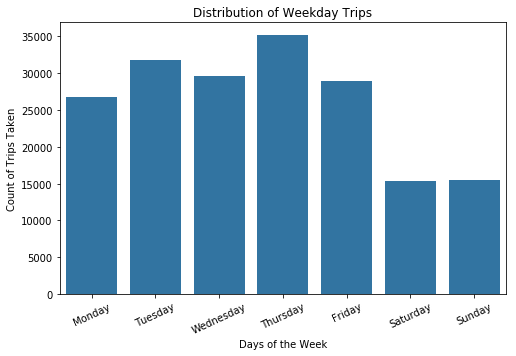

In [6]:
weekdays = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
base_color = sb.color_palette()[0]

plt.figure(figsize = [8,5])
sb.countplot(data=bike_trips, x='weekday', order = weekdays, color=base_color)
plt.title('Distribution of Weekday Trips')
plt.xticks(rotation=25)
plt.xlabel('Days of the Week')
plt.ylabel('Count of Trips Taken')
plt.show()

## Hourly Trips Distribution
Hour is a measure of the time of the day most bike trips were taken. <br>
The plot seems to be bimodal, with one peak at 8 and the other at 17. This implies that the bike are mostly used around 8am and around 5pm. 1,2,3,4 have extremely low values, which is reasonably so because they are the dead of the night when people hardly commute.

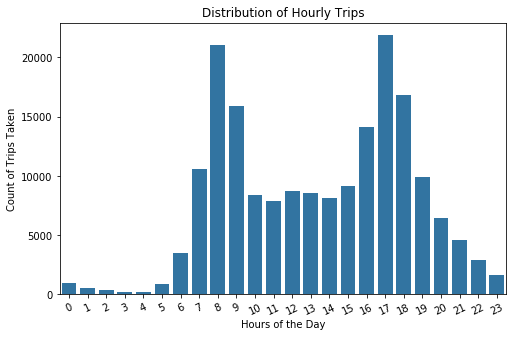

In [7]:
plt.figure(figsize = [8,5])
sb.countplot(data=bike_trips, x='hour', color=base_color)
plt.title('Distribution of Hourly Trips')
plt.xticks(rotation=25)
plt.xlabel('Hours of the Day')
plt.ylabel('Count of Trips Taken')
plt.show()

## Distribution of Trip Durations

Trip Duration in the dataset take on a very large range of values, from about 61secs at the lowest, to about 85444secs at the highest. Plotted on a logarithmic scale, the distribution of trip duration takes on a unimodal shape.

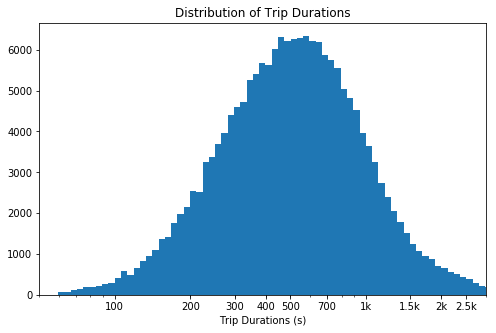

In [8]:
log_binsize = 0.025
bins = 10 ** np.arange(1.7, np.log10(bike_trips['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bike_trips, x = 'duration_sec', bins = bins)
plt.title('Distribution of Trip Durations')
plt.xscale('log')
plt.xticks([100,200,300,400, 500,700, 1e3, 1.5e3, 2e3, 2.5e3,], ['100','200','300','400','500','700', '1k','1.5k', '2k', '2.5k'])
plt.xlim((0,3000))
plt.xlabel('Trip Durations (s)')
plt.show()

## Weekday vs User Type

Plotting a stacked bar chart of number of trips taken by each user type on different weekdays shows that the number of trips made by customers across various weekdays is almost the same thing, but the number of trips made by subscriber follow the order from the univariate plot of weekdays

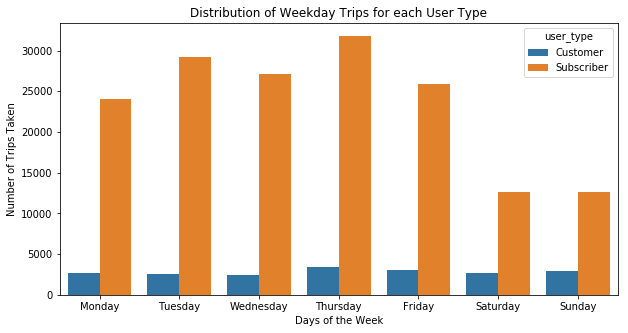

In [9]:
plt.figure(figsize = [10,5])
sb.countplot(data=bike_trips, x='weekday', hue='user_type', order=weekdays)
plt.title('Distribution of Weekday Trips for each User Type')
plt.xlabel('Days of the Week')
plt.ylabel('Number of Trips Taken')
plt.show();

## Trip Duration by Days of the Week and User Type

I extended my investigation of trip duration against weekday in this section by looking at the impact of user type. The multivariate exploration here showed that user type doesn't have effect on trip durations for each weekday.

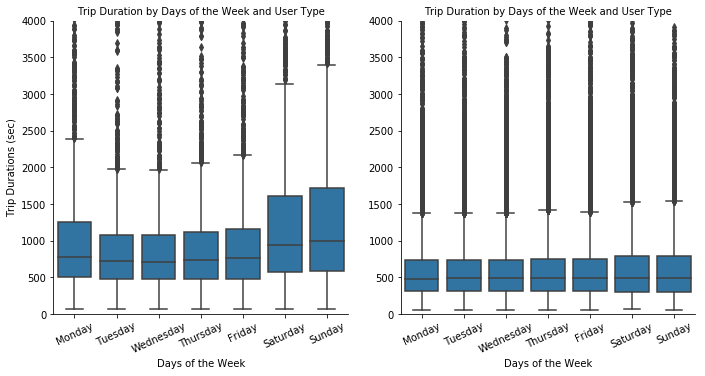

In [29]:
g=sb.FacetGrid(data=bike_trips, col='user_type', size=5)
g.map(sb.boxplot, 'weekday', 'duration_sec', order=weekdays)
plt.ylim(0,4000)
g.set_titles('Trip Duration by Days of the Week and User Type')
g.set_xticklabels(rotation=25) #to rotate all xticks
g.set_xlabels('Days of the Week')
g.set_ylabels('Trip Durations (sec)')

In [30]:
!jupyter nbconvert  Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 388123 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/